## Rei Campo
### Sub Analysis: Finding The Thresholds for Stable Circumbinary Orbits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'
from scipy import integrate
from celluloid import Camera
import gravSolve as gs
import plotter as p
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import FuncAnimation
from astropy import constants as const
from astropy import units as u

### In this sub analysis, I will be finding where circumbinary orbits become unstable by both looking at how close can the exoplanet get to their binary stars and how far away until they are just flung from the system. 

#### In order to do this, we will be using Kepler's Laws for both the binary stars and for the exoplanet itself to find their velocities denoted by v1, v2, and v3 respectively.



In [2]:
#units used: AU, Msun, yr
G = const.G.to('AU**3/Msun*yr**2').value
M1 = 100
M2 = 100
M3 = .001
e = 0.3300
a = 0.326


# kepler's laws
Mtot = M1 + M2
mu = M1 * M2 / Mtot
ell = np.sqrt(G * Mtot * a * (1.0 - e**2))
P = 2.0 * np.pi * np.sqrt(a**3 / (G * Mtot))

# set initial conditions correpsonding to apoapsis
rap = a * (1.0 + e)
vap = ell / rap

# positions and velocities of the two stars
a1 = rap * mu / M1
a2 = rap * mu / M2
v1 = vap * mu / M1
v2 = vap * mu / M2

#Now using Kepler's Laws on the planet to find it's velocity
Planet_Mtot = (M1 + M2) + M3
Planet_mu = (M1 + M2) * M3 / Planet_Mtot
Planet_ell = np.sqrt(G * Planet_Mtot * a * (1.0 - e**2))
Planet_P = 2.0 * np.pi * np.sqrt(a**3 / (G * Planet_Mtot))

Planet_vap = Planet_ell / rap

a3 = rap * Planet_mu / M3
v3 = Planet_vap * Planet_mu / M3

In [3]:
def body3(pos, p = 1, ϵ = 0.0001):
    body1Pos = [a1, 0, 0] #(x,y,z)
    body1Velo = [0, v1, 0] #(vx,vy,vz)

    body2Pos = [-a2, 0, 0] #(x,y,z)
    body2Velo = [0, v2, 0] #(vx,vy,vz)

    body3Pos = [pos, 0, 0]
    body3Velo = [0, v3, 0]

    mass = np.array([M1, M2, M3])
    pos = np.array([body1Pos, body2Pos, body3Pos]).flatten()
    velo = np.array([body1Velo, body2Velo, body3Velo]).flatten()
    v0 = np.array([pos, velo]).flatten()
    tarr = np.linspace(0.0, (6 * P) * p, 1e3)
    result = integrate.odeint(gs.df_Nbody, v0, tarr, args = (mass, G, ϵ))
    return result, tarr

### I am first going to begin by looking for when the orbit becomes unstable when it gets too close to the binary system. In the graphs that will be produced, we will be concluding stable orbits when we see a periodic function or if there is a clear orbit. Some of these periodic functions/orbits will be a bit hectic, but nonetheless periodic, representing a stable orbit. 

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app
/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


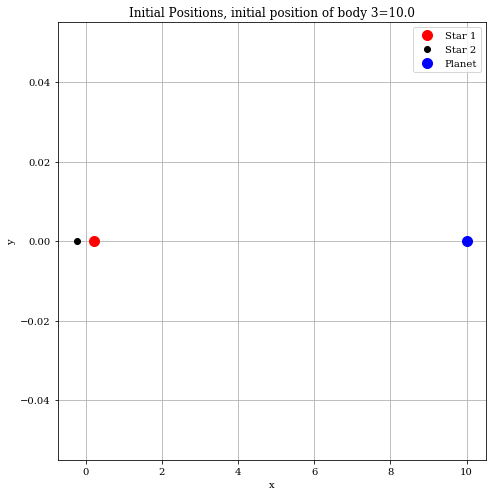

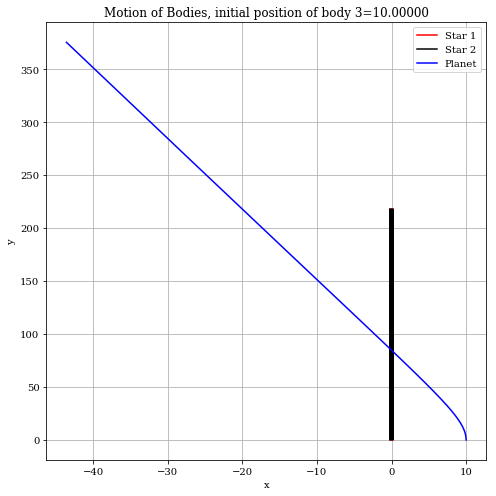

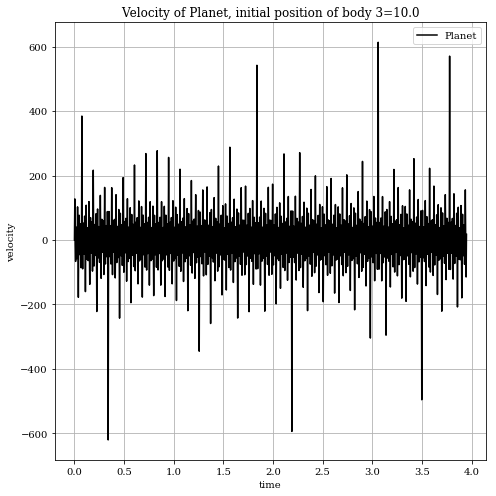

In [4]:
planet_position = 10
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

### Above, I started out with the distance of the planet = 10 and I changed the ecentricity to e = 0.01. When originally plotting, I used the given ecentricity of e = 0.0001. This did not work and made the planet an S-Type orbit. We can see that the orbit is being thrown out of the system, so this is not a stable orbit.

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


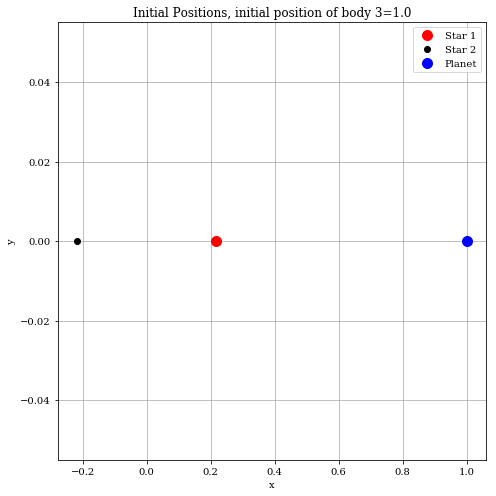

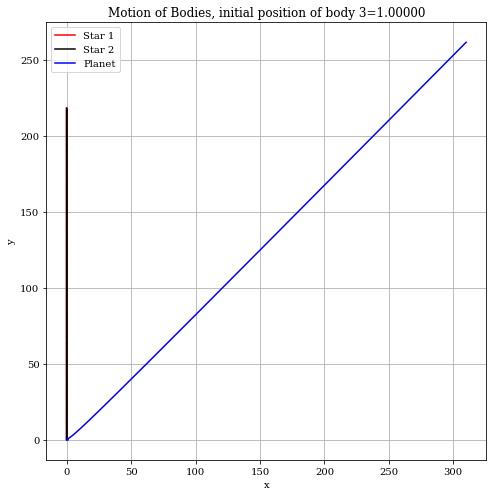

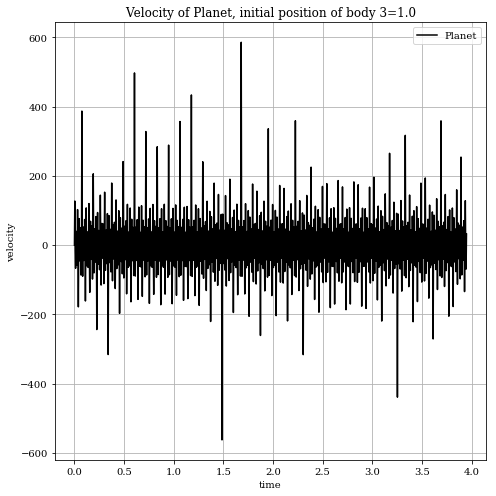

In [5]:
planet_position = 1
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

### Above, I now changed the position to 1 while keeping the same ecentricity. As we can see, the planet does orbit around the binary system, but eventually gets flung out. I will now be inspecting further in betwwen 1 and 10.

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


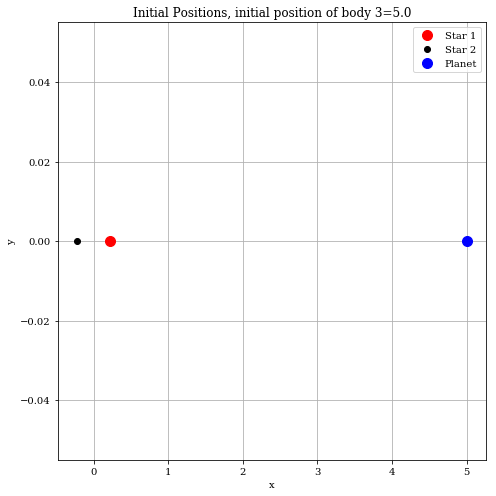

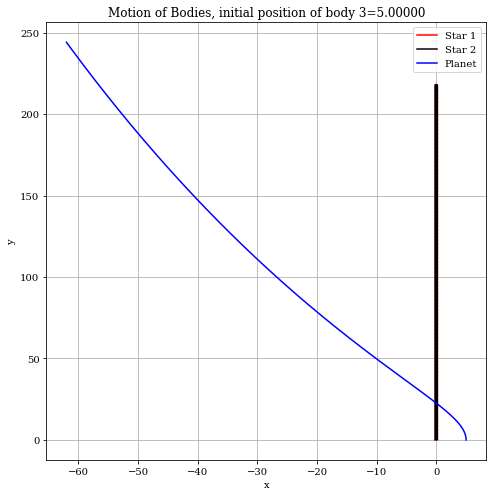

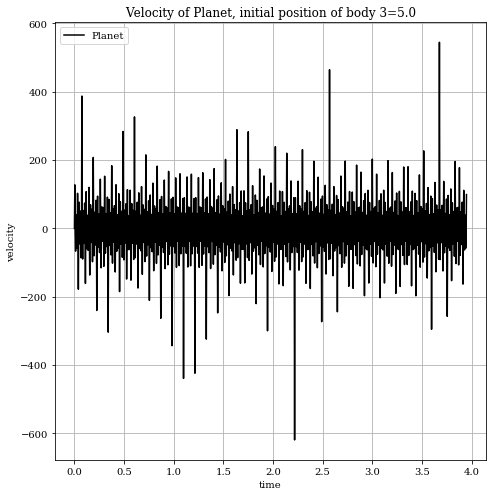

In [6]:
planet_position = 5
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

### Once again, we can see that the planet gets flung out of the system. I will be inspecting closer to 1 now.

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


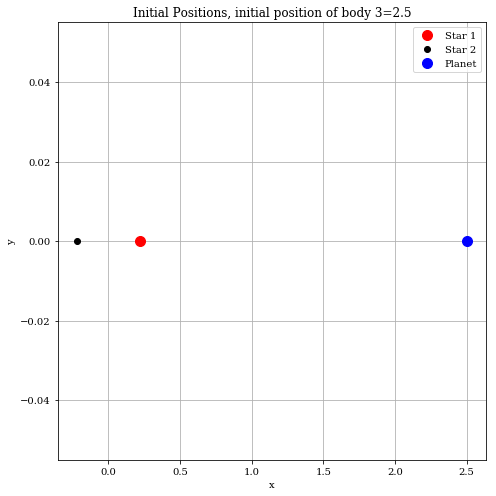

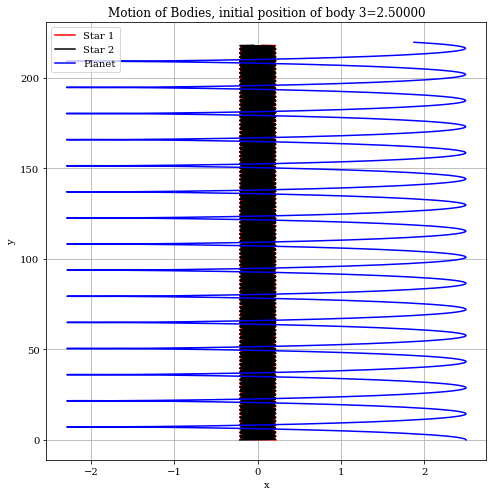

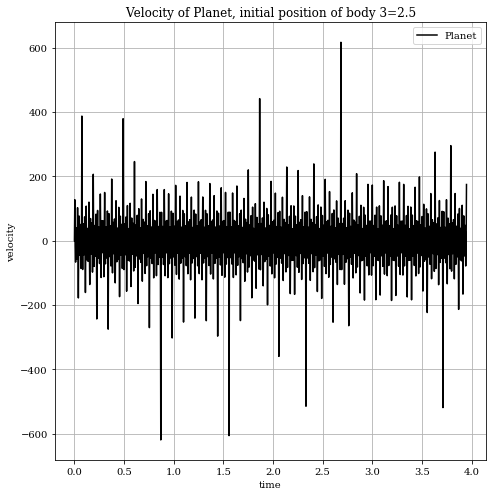

In [7]:
planet_position = 2.5
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


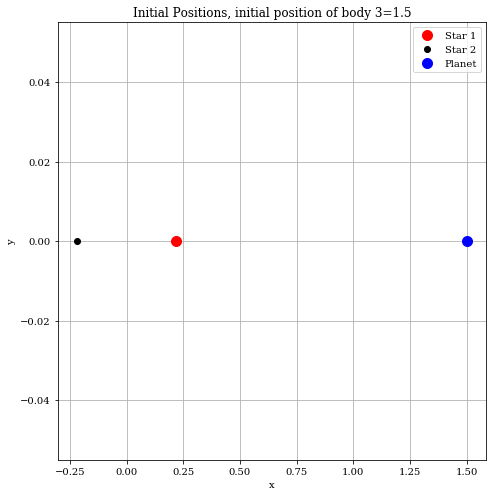

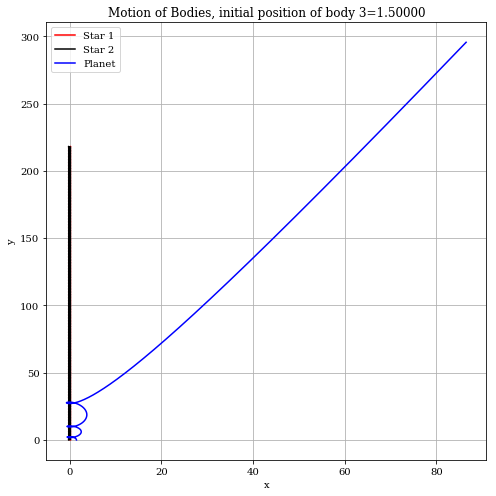

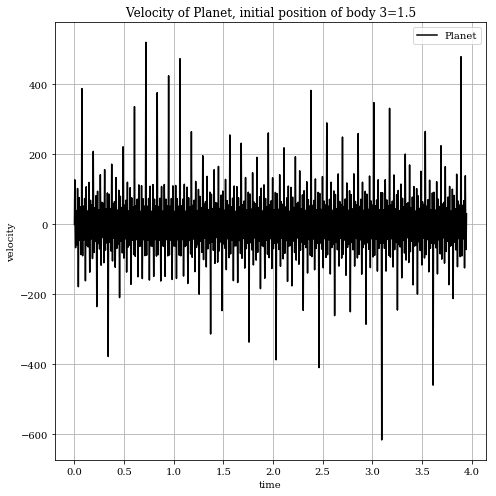

In [8]:
planet_position = 1.5
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


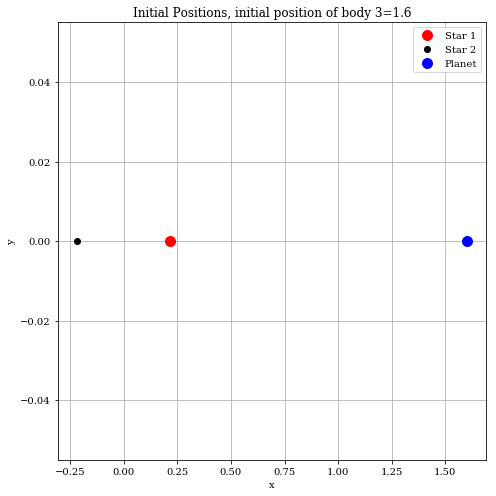

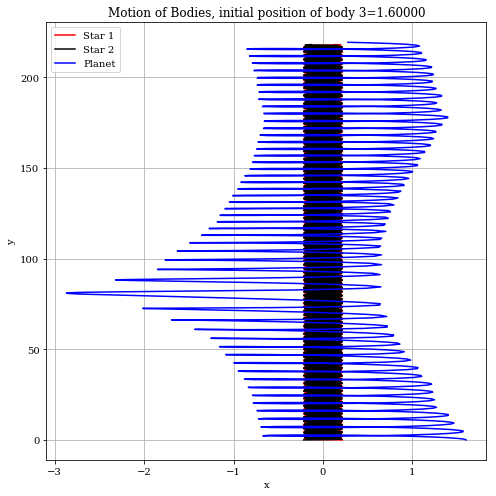

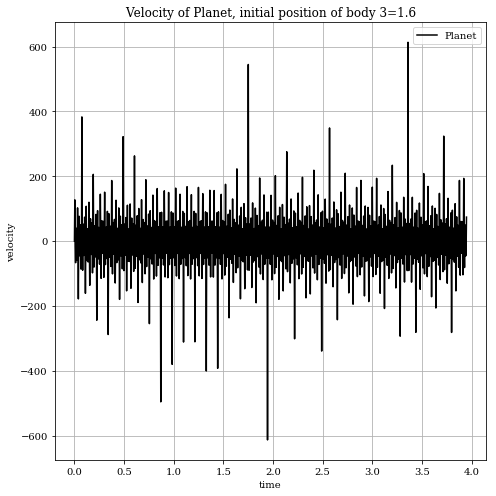

In [9]:
planet_position = 1.6
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


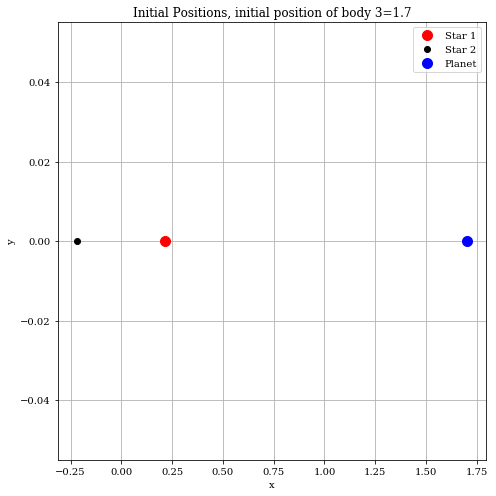

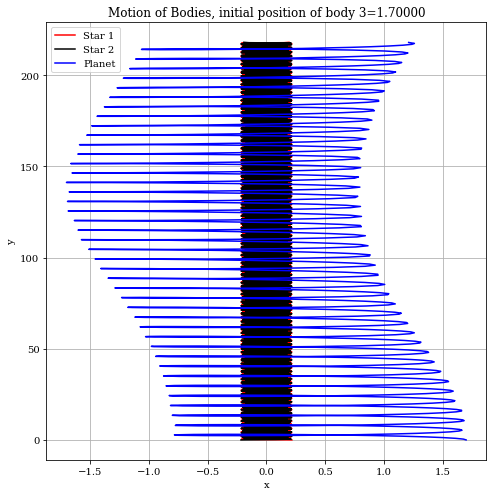

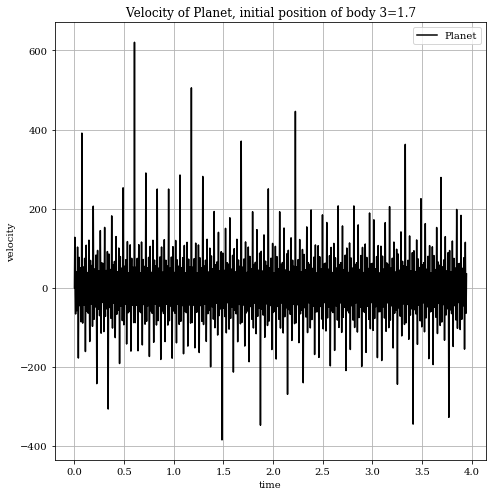

In [10]:
planet_position = 1.7
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app
/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


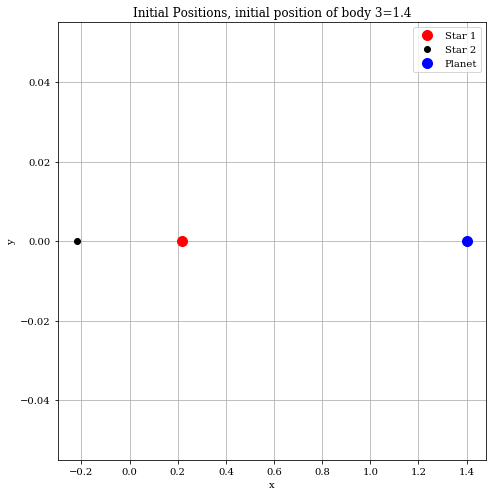

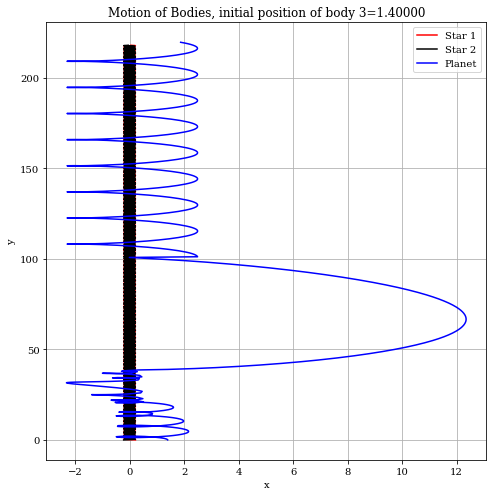

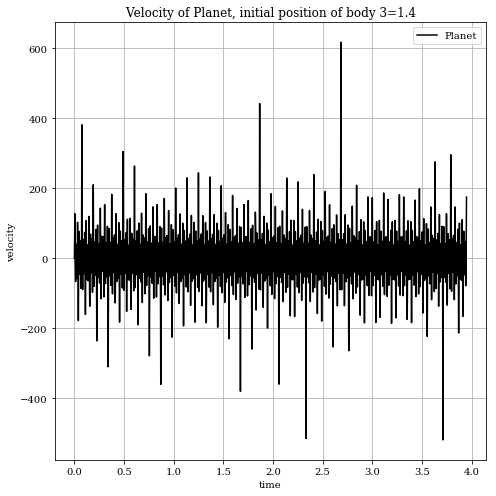

In [11]:
planet_position = 1.4
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


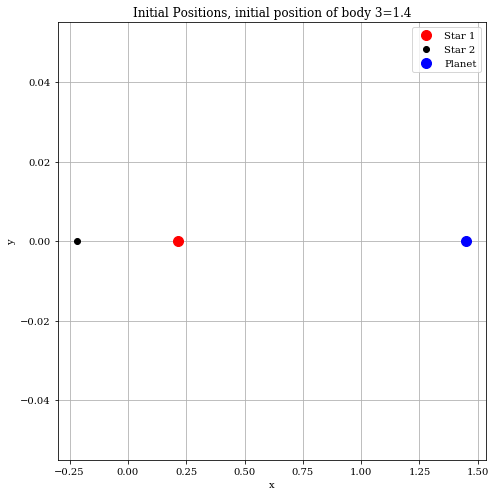

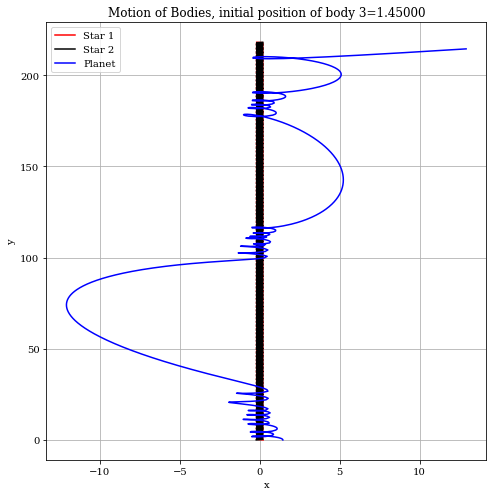

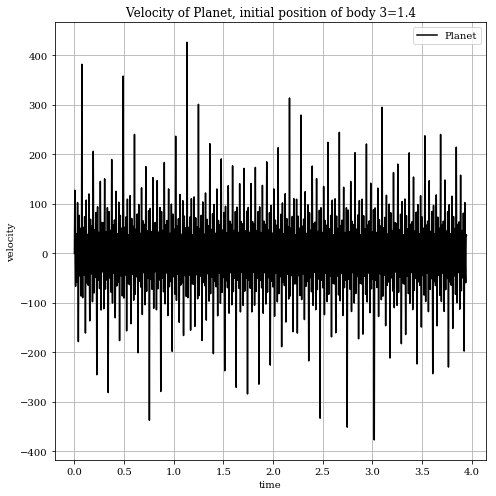

In [12]:
planet_position = 1.45
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


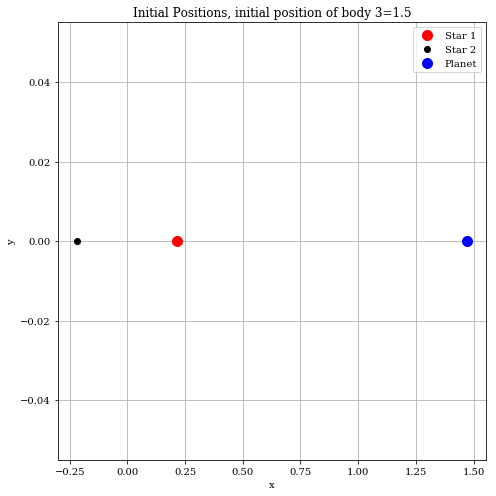

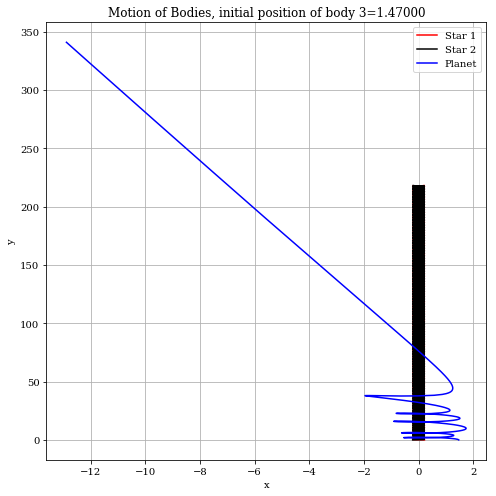

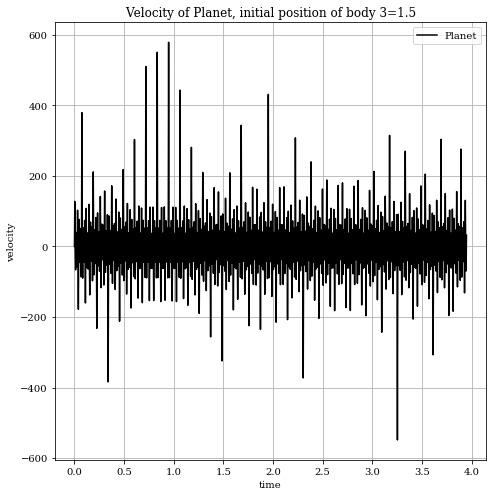

In [13]:
planet_position = 1.47
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


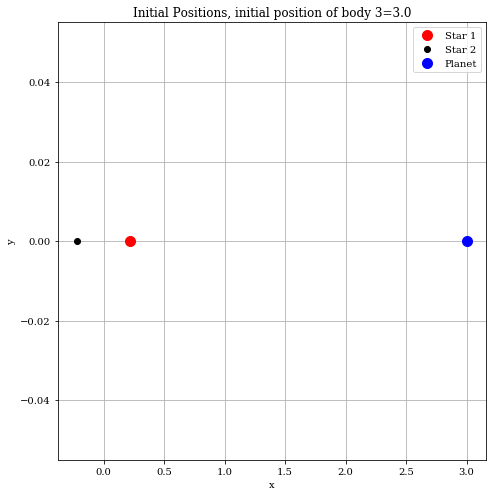

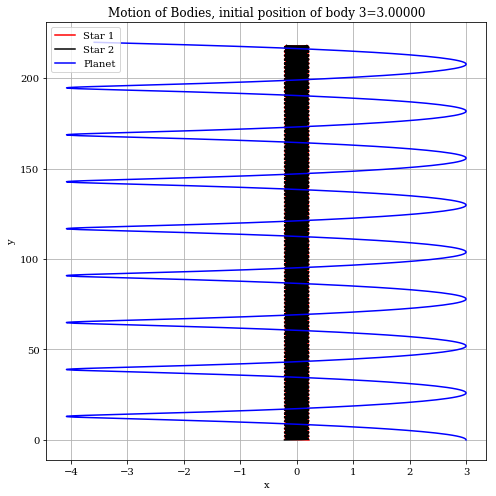

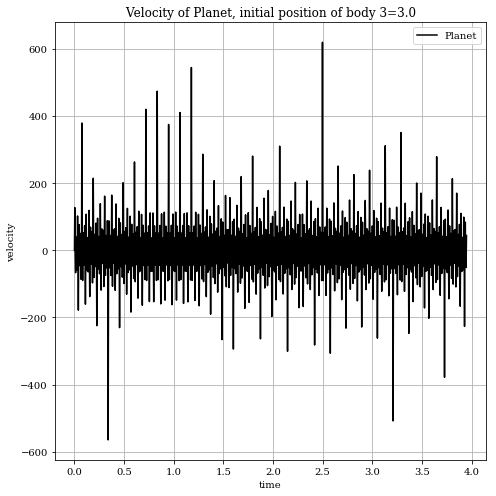

In [14]:
planet_position = 3
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


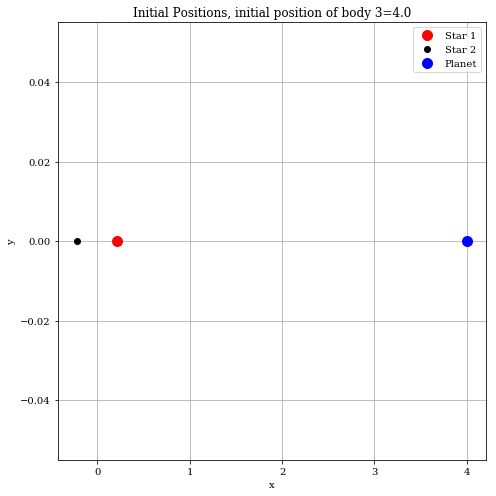

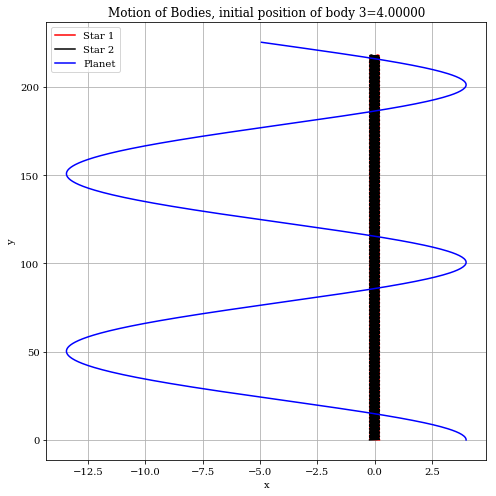

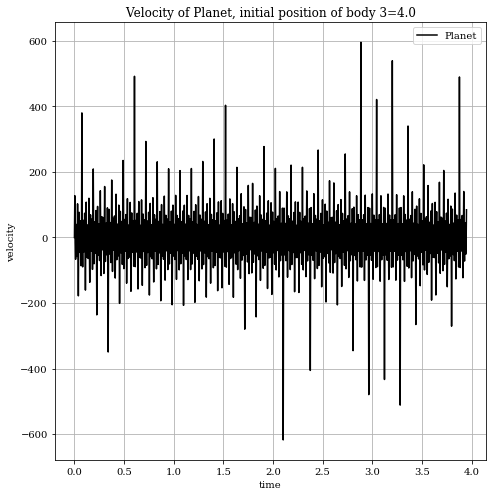

In [15]:
planet_position = 4
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


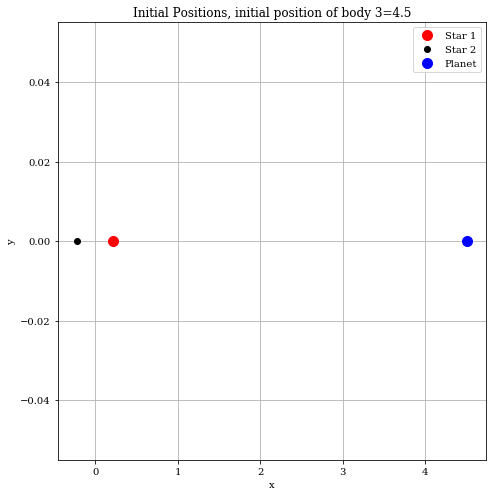

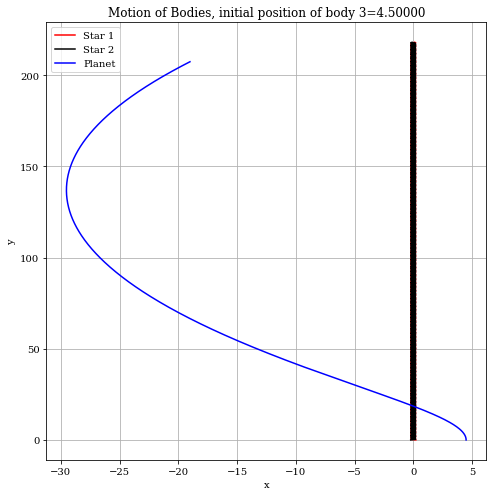

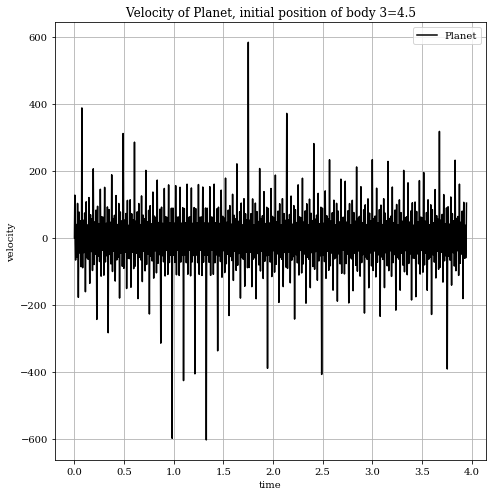

In [16]:
planet_position = 4.5
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


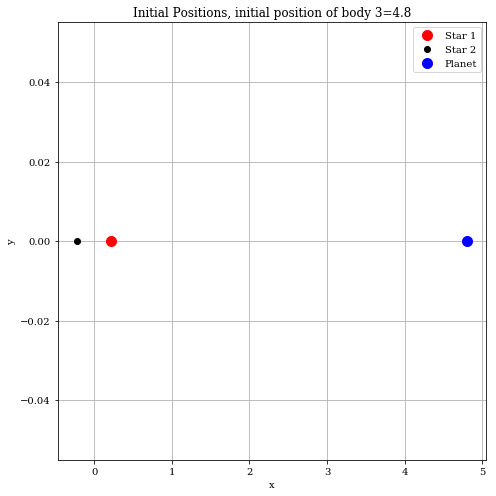

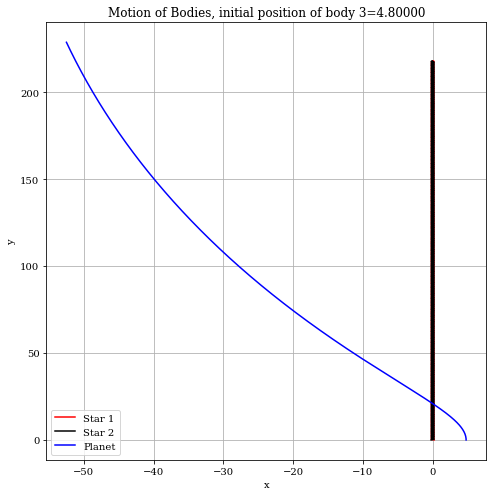

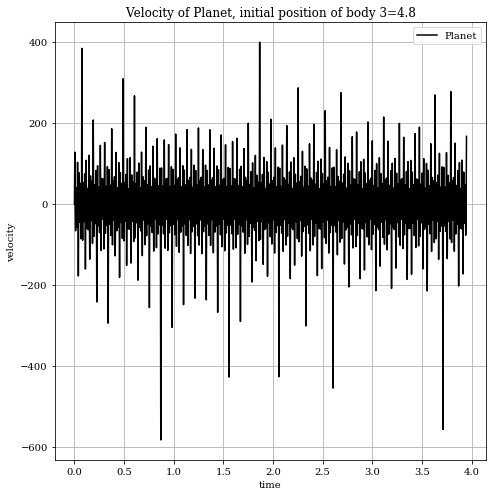

In [17]:
planet_position = 4.8
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


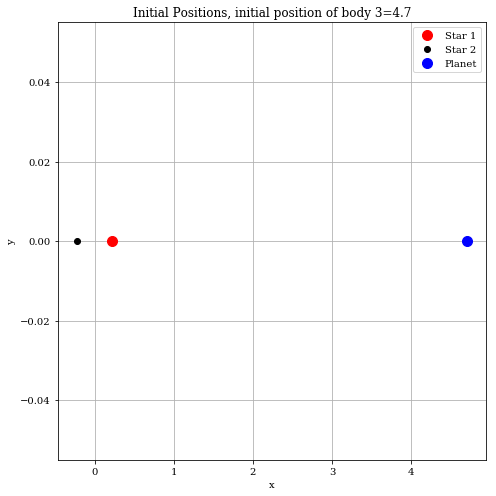

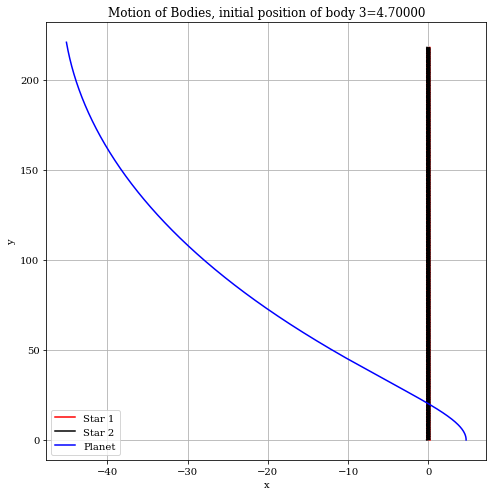

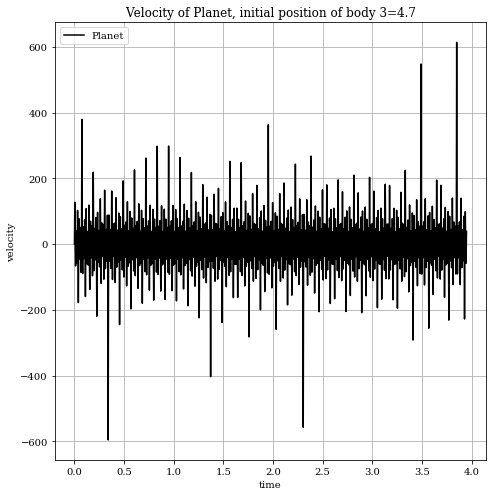

In [18]:
planet_position = 4.7
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

/Users/RachelCampo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


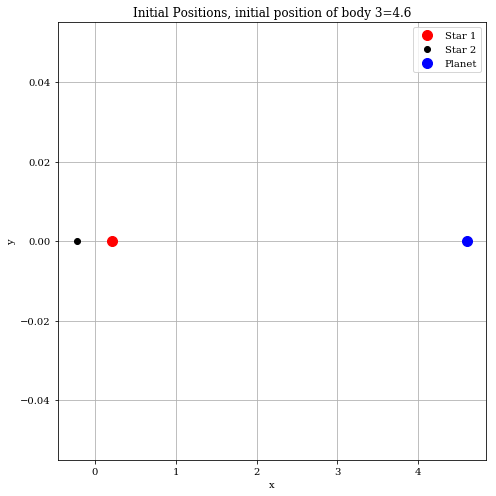

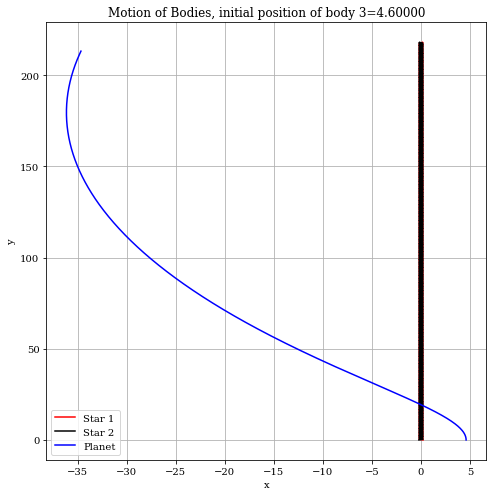

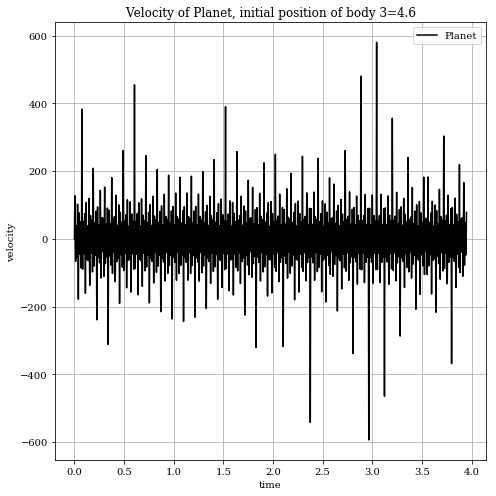

In [19]:
planet_position = 4.6
result, tarr = body3(planet_position, p = 50, ϵ = 0.01)
p.plotter(result, 1,1,1 , planet_position, proj = 0, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 2, tarr = tarr)
p.plotter(result, 1,1,1 , planet_position, proj = 4, tarr = tarr)

### The conclusion of this sub analysis is that the planet is stable at the initial positions of 1.6 and 4.6 for when both stars masses are M = 100 and the planet's mass m = 0.001.